In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
import seaborn as sns

In [2]:
df=pd.read_csv("D:/Machine Learning/thuc hanh/datasets/Diabetics prediction/diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
# tinh ti le 0 vs 1
500*100/df.shape[0]

65.10416666666667

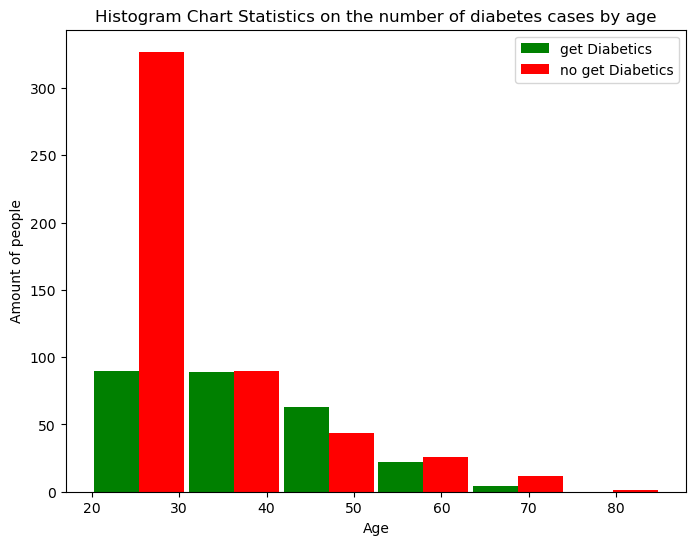

In [6]:

from matplotlib import figure
outcome_yes = df[df['Outcome'] == 1]['Age']
outcome_no=df[df['Outcome']==0]['Age']
plt.figure(figsize=(8, 6))
plt.xlabel('Age')
plt.ylabel('Amount of people')
plt.hist([outcome_yes,outcome_no],rwidth=0.95, bins=6, range=(20, 85), color=['green', 'red'], label=['get Diabetics', 'no get Diabetics'])
plt.title('Histogram Chart Statistics on the number of diabetes cases by age')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

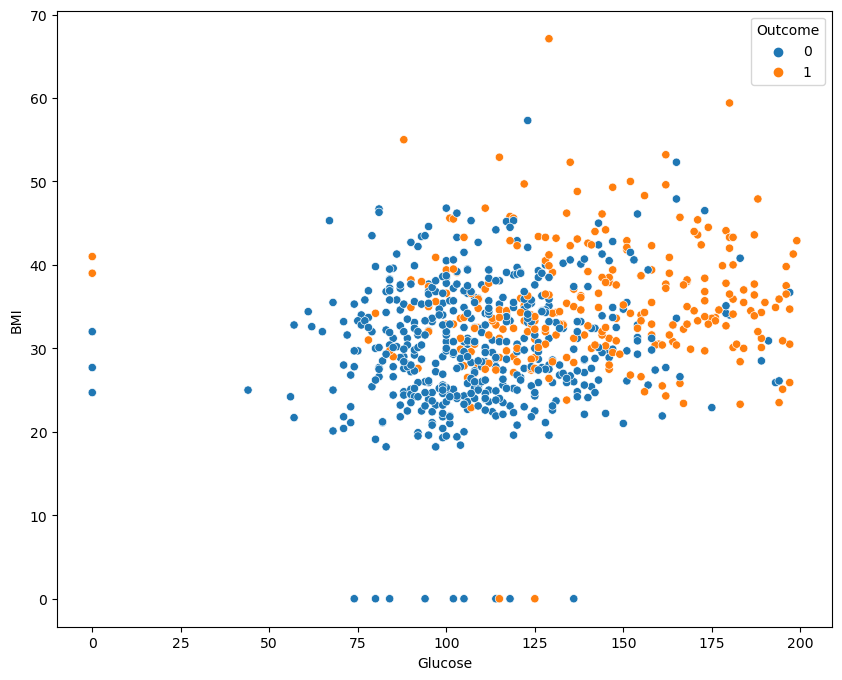

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df,x = 'Glucose', y = 'BMI',hue = 'Outcome')

In [22]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [11]:
y_test_prediction=classifier.predict(X_test)
y_test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [28]:
#  du doan nguoi có thông số nào đó có bị mắc bệnh hay không
prediction = classifier.predict([[6, 200, 75, 25, 110, 26.3, 0.3, 32]])
prediction

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [12]:
comparison=pd.DataFrame({'Actual':y_test,'Predicted':y_test_prediction})
comparison

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
241,0,0
599,0,0
650,0,0
11,1,1


In [13]:
from sklearn.metrics import accuracy_score
# đánh giá hiệu suất của mô hình trên tập kiểm thử 
print(accuracy_score(y_test,y_test_prediction))

0.7748917748917749


In [14]:
# đánh giá hiệu suất của mô hình trên tập huấn luyện
y_train_prediction=classifier.predict(X_train)
print(accuracy_score(y_train,y_train_prediction))

0.7746741154562383


In [15]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_test_prediction)
print(conf_mat)

[[132  14]
 [ 38  47]]


Text(120.72222222222221, 0.5, 'Actual value')

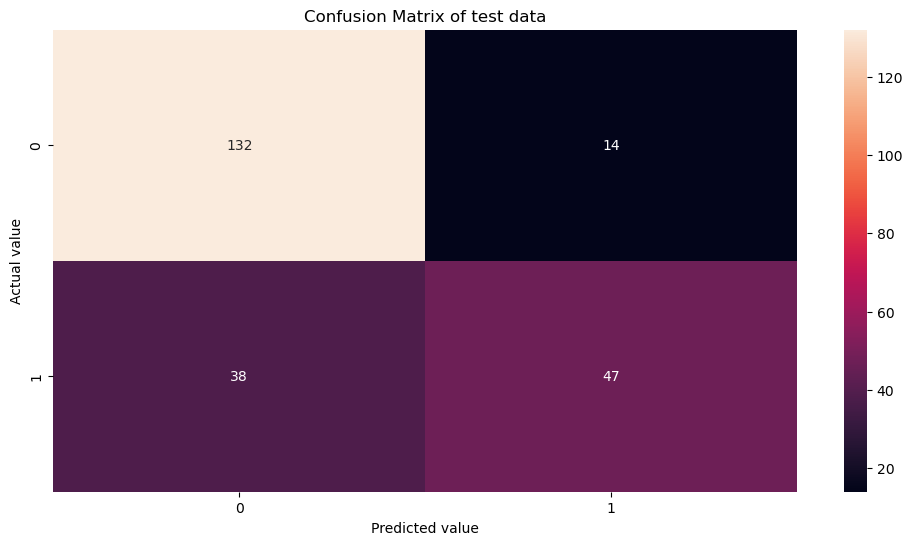

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of test data")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")